In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier


plt.style.use('ggplot')

In [6]:
df = pd.read_csv('Datamodified.csv')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,568.000000,569.000000,569.000000,568.000000,566.000000,568.000000,567.000000,567.000000,567.000000,...,567.000000,568.000000,569.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.130245,19.289649,105.047821,654.229225,0.096248,0.104354,61.817244,0.048854,0.710289,...,16.276118,25.687271,107.261213,880.583128,0.132369,0.254265,0.271431,0.114606,0.290076,0.083946
std,1.250206e+08,3.526450,4.301036,312.218444,353.150358,0.013971,0.052858,1469.858104,0.038787,12.596692,...,4.840100,6.146996,33.602542,569.356993,0.022832,0.157336,0.208023,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,0.800000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.697500,16.170000,75.210000,419.900000,0.086130,0.064815,0.029570,0.020310,0.162000,...,13.010000,21.095000,84.110000,515.300000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460
50%,9.060240e+05,13.375000,18.840000,86.340000,548.750000,0.095825,0.092525,0.061550,0.033500,0.179300,...,14.970000,25.425000,97.660000,686.500000,0.131300,0.211900,0.226550,0.099930,0.282200,0.080040
75%,8.813129e+06,15.797500,21.800000,104.300000,784.150000,0.105250,0.130425,0.132000,0.073820,0.195800,...,18.800000,29.757500,125.400000,1084.000000,0.146000,0.339100,0.381400,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,7517.000000,2501.000000,0.163400,0.345400,35000.000000,0.201200,300.130000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Diagnosis is our target variable. ID is not needed. We will use Machine Learning to determine the best features for a model

In [8]:
df.drop('id', axis=1, inplace=True)
y = df.diagnosis # M or B our target variable
X = df.drop('diagnosis', axis=1) # data to use
df.dropna(inplace=True) # There is only a few NAs so dropping the row might no affect the analysis

In [9]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Checking For Outliers

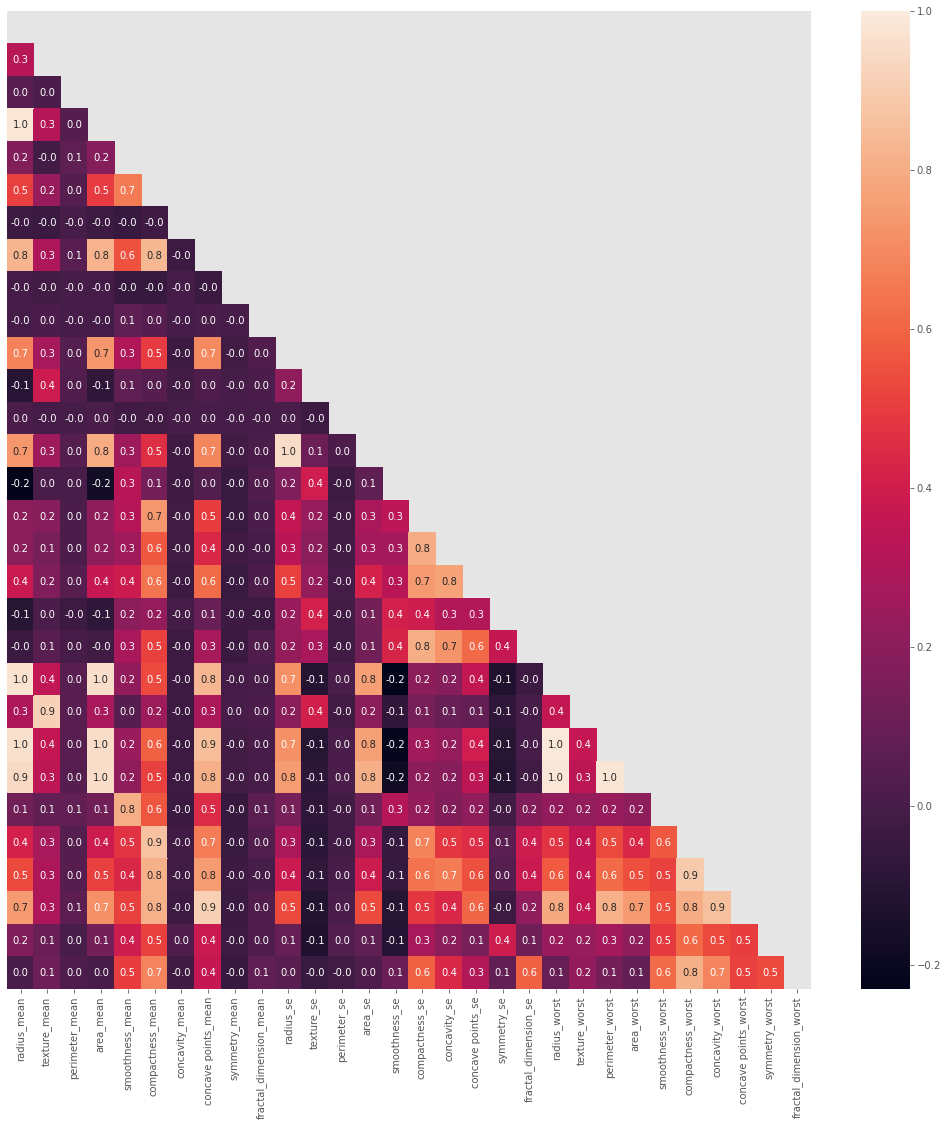

In [10]:
# X variable has all numeric columns minus the response variable
# Since there are so many features/columns we will change the matrix to show only a triangle or one diagonal side of the matrix

mask = np.triu(np.ones_like(X.corr(), dtype=np.bool)) # Using NumPy's triu for the triangle, one_like for array, X.corr for correlations

f, ax = plt.subplots(figsize=[18, 18])
ax = sns.heatmap(X.corr(), mask=mask, annot=True, yticklabels=False, fmt='.1f') 
plt.show()

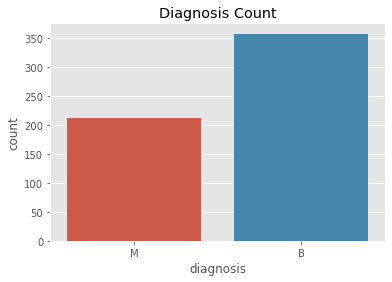

In [11]:
sns.countplot(y, label="Count")
B, M = y.value_counts()
plt.title('Diagnosis Count')
plt.show()

# Visual EDA

While trying to understand the data we're going to look at the distribution of the features

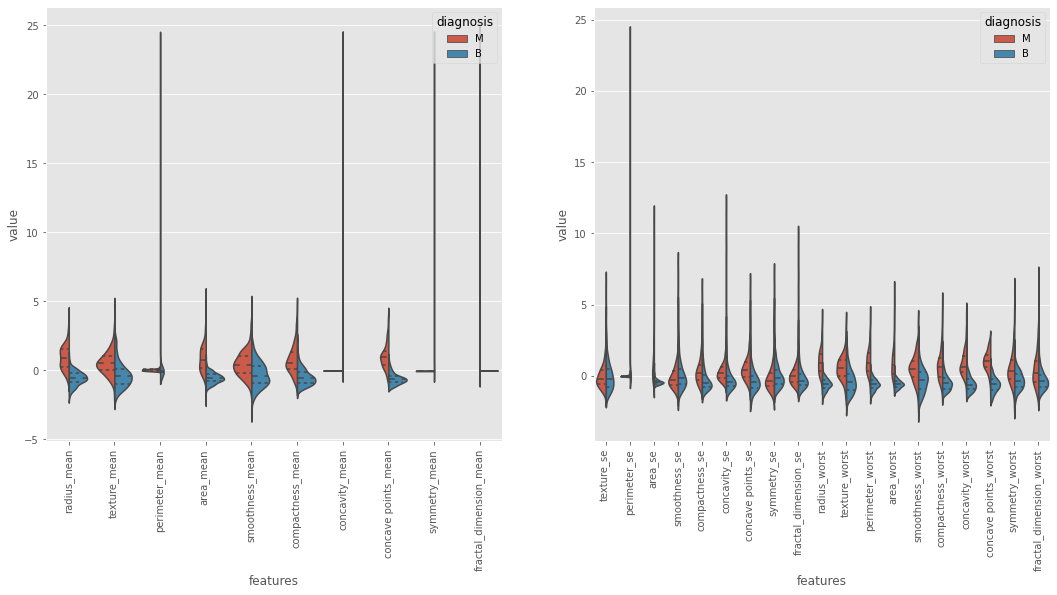

In [12]:
diagnosis_data = y
no_diag_data = X
# Standarization to rescale data to have a mean of 0 and std dev of 1
data_2 = (no_diag_data - no_diag_data.mean()) / (no_diag_data.std())

new_data = pd.concat([y, data_2.iloc[:, :10]], axis=1) # Grabbing the first 10 features
new_data = pd.melt(new_data, id_vars='diagnosis', var_name='features', value_name='value')
new_data2 = pd.concat([y, data_2.iloc[:, 11:]], axis=1) # Rest of features
new_data2 = pd.melt(new_data2, id_vars='diagnosis', var_name='features', value_name='value')


f, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,8))
ax0 = sns.violinplot(x='features', y='value', hue='diagnosis', data=new_data, split=True, inner='quart', ax=ax0)
ax1 = sns.violinplot(x='features', y='value', hue='diagnosis', data=new_data2, split=True, inner='quart', ax=ax1)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

Texture mean looks like it can be used to classify between B and M. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

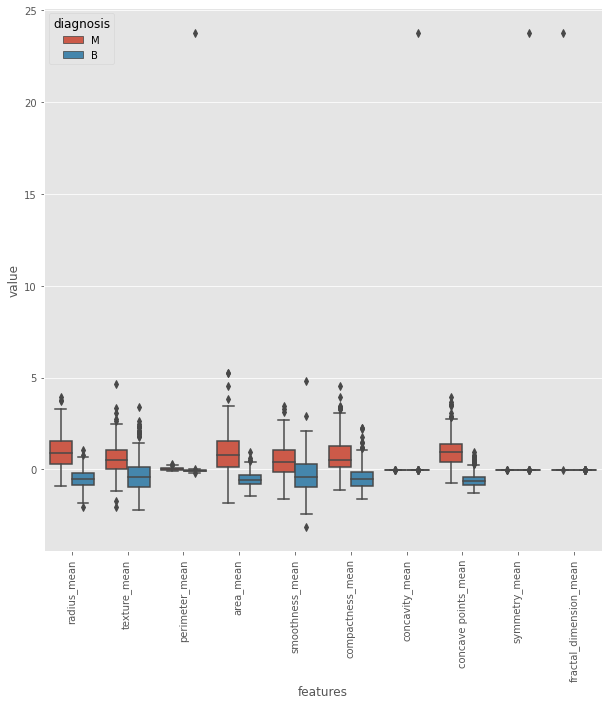

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=new_data)
plt.xticks(rotation=90)

After reviewing the data and seeing the outliers are quite extreme. We'll remove them to avoid problems with the analysis.
perimeter_mean, concavity_mean, symmetry_mean, fractal_dimension_mean <- Have outliers to remove all can be set to below 10


# Feature Selection Technique: Feature Importance Score with Extra Trees Based Classifier

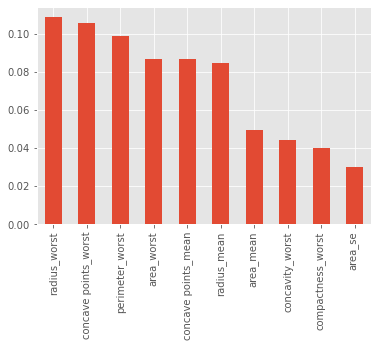

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop('diagnosis', axis=1)
y = df.diagnosis


etc = ExtraTreesClassifier()
etc.fit(X, y)
#print(etc.feature_importances_)

# Plot it 
important_feats = pd.Series(etc.feature_importances_, index=X.columns)
important_feats.nlargest(10).plot(kind='bar') # Selecting the top 10 most important (nlargest)
plt.show()

# Logistic Regression

In [36]:
print(X.shape)
print(y.shape)

(545, 30)
(545,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

print(classification_report(y_test, y_pred))


precision    recall  f1-score   support

           B       0.93      0.97      0.95       105
           M       0.94      0.86      0.90        59

    accuracy                           0.93       164
   macro avg       0.94      0.92      0.93       164
weighted avg       0.93      0.93      0.93       164



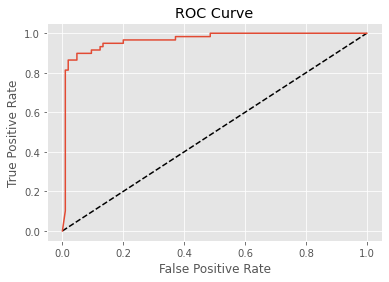

In [33]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='M')

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
roc_auc_score(y_test, y_pred_prob)

0.9662631154156578

In [43]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
for i in cv_scores:
    print(f"{round(i * 100,3)}% Accuracy")

98.841% Accuracy
98.587% Accuracy
98.333% Accuracy
96.594% Accuracy
99.194% Accuracy


In [46]:
X = (X -np.min(X))/(np.max(X)-np.min(X)).values
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           B       0.94      0.99      0.96       105
           M       0.98      0.88      0.93        59

    accuracy                           0.95       164
   macro avg       0.96      0.94      0.95       164
weighted avg       0.95      0.95      0.95       164



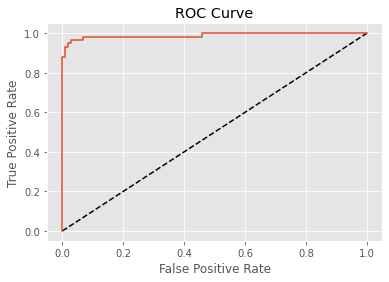

In [47]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='M')

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
for i in cv_scores:
    print(f"{round(i * 100,3)}% Accuracy")

98.551% Accuracy
99.638% Accuracy
100.0% Accuracy
98.152% Accuracy
99.853% Accuracy


## We want to try to use k-NN (K Nearest Neighbors Classification)
Let's see the best number of neighbors we should use for this problem

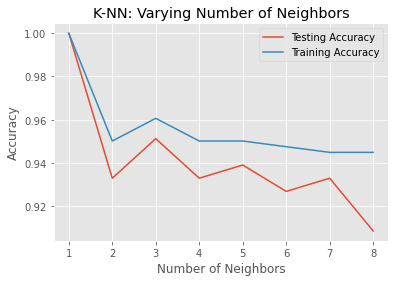

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# We'll try 1-9 neighbors

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over the different values of k (neighbors)
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the Classifier
    knn.fit(X, y)
    # Compute Accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute Accuracy on test set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate Plots
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Looking at this chart we can see that the sweet spot seems to be between 3-5 but I'd like to try out 3 to 5 

In [17]:
neighbors = [3, 4, 5]

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_test, y_test)
    y_pred = knn.predict(X_test)
    #print(f"Test set predictions are {y_pred}")
    print(knn.score(X_test, y_test)) # Check Accuracy of our model

0.9573170731707317
0.9329268292682927
0.926829268292683


We can see here that 3 neighbors is the best way to go since it is has the highest accuracy